In [23]:
%matplotlib inline
# Import libraries
from SensorimotorExploration.Systems.Diva2017a import Diva2017a as Diva
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec


In [2]:
# Create System
system = Diva()

[ 0.          0.          0.          1.06615085  1.10781126  1.        ]


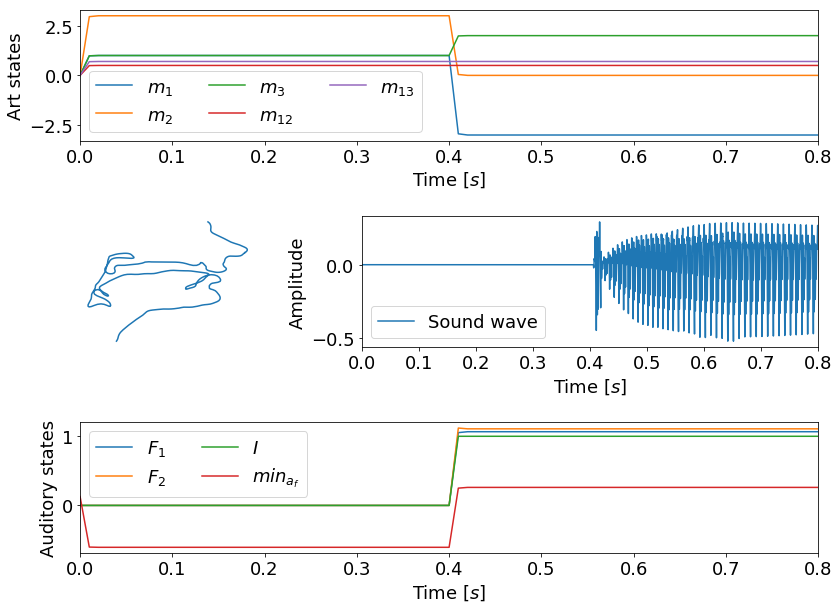

In [37]:
# Parameters and Motor command
duration_m1 = 0.4
duration_m2 = 0.4
w0 = 2 * np.pi / 0.01
damping_factor = 1.01
motor_command = np.array([.0]*26)
motor_command[0] = 1.
motor_command[13] = -3.0

motor_command[1] = 3.0

motor_command[2] = 1.0
motor_command[15] = 2.0

motor_command[11] = 0.5
motor_command[12] = 0.7
motor_command[24] = 0.5
motor_command[25] = 0.7

par_kargs = {'duration_m1': duration_m1,
             'duration_m2': duration_m2,
             'w0': w0,
             'damping_factor': damping_factor}

system.set_params(**par_kargs)
system.set_action(motor_command)
system.execute_action()

# fig, ax = plt.subplots(2,3)

# system.plot_vt_shape(axes=ax[0,0])
# system.plot_arts_evo(range(13),axes = ax[0,1])
# system.plot_sound(axes=ax[0,2])
# system.plot_aud_out(range(4),axes=ax[1,0])
# system.plot_som_out(range(8),axes=ax[1,1])
# system.plot_cons_out(axes=ax[1,2])
print(system.sensor_out)

matplotlib.rcParams['figure.figsize'] = (12.0, 11.0)
matplotlib.rcParams.update({'font.size': 18})

fig_ = plt.figure()
fig = gridspec.GridSpec(4, 3)

ax=[]
ax += [plt.subplot(fig[0, :])]
ax += [plt.subplot(fig[1, 1:])]
ax += [plt.subplot(fig[2, :])]
ax += [plt.subplot(fig[1, 0])]

system.plot_arts_evo([0,1,2,11,12],axes = ax[0])
plt.xlabel('Time [$s$]')
plt.ylabel('Art states')
ax[0].set_xlim([0,0.8])
# ax[0].set_ylim([0,0.8])
plt.legend(['$m_1$','$m_2$','$m_3$','$m_{12}$','$m_{13}$'],loc=3,ncol=3)


system.plot_aud_out([1,2,0],axes=ax[2])
system.plot_cons_out(axes=ax[2])
plt.xlabel('Time [$s$]')
plt.ylabel('Auditory states')
ax[2].set_xlim([0,0.8])
# ax[0].set_ylim([0,0.8])
plt.legend(['$F_1$','$F_2$','$I$','$min_{a_f}$'],ncol=2)

system.plot_sound(axes=ax[1])
plt.xlabel('Time [$s$]')
plt.ylabel('Amplitude')
ax[1].set_xlim([0,0.8])
# ax[0].set_ylim([0,0.8])
plt.legend(['Sound wave'],loc=3)
plt.tight_layout()

system.plot_vt_shape(axes=ax[3])
ax[3].invert_xaxis()

In [5]:
len(system.cons_states)

81

In [38]:
# fig.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/IEEE_TCDS_Special_Issue/images/diva_system.eps',\
#              format='eps', dpi=1000, bbox_inches='tight')

fig_.savefig('diva_system.eps',format='eps', dpi=1000, bbox_inches='tight')